Question: 1

1. Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [4]:
data = pd.read_csv('instagram_reach.csv')
print(data)

    Unnamed: 0  S.No              USERNAME  \
0            0     1         mikequindazzi   
1            1     2       drgorillapaints   
2            2     3    aitrading_official   
3            3     4  opensourcedworkplace   
4            4     5           crea.vision   
..         ...   ...                   ...   
95           8    19        michaelgarza__   
96           9    21           dvlp_search   
97          10    22            ecom.space   
98          11    24        lb3enterprises   
99          12    25          palmariusdev   

                                              Caption  Followers  \
0   Who are #DataScientist and what do they do? >>...       1600   
1   We all know where it’s going. We just have to ...        880   
2   Alexander Barinov: 4 years as CFO in multinati...        255   
3                                                sfad        340   
4   Ever missed a call while your phone was chargi...        304   
..                                     

In [6]:
data['Time since posted'] = pd.to_timedelta(data['Time since posted']).dt.total_seconds()

In [7]:
timedelta_series = pd.to_timedelta(data['Time since posted'])
total_seconds_series = timedelta_series.dt.total_seconds()
data['Time since posted'] = total_seconds_series

In [8]:
def count_hashtags(text):
    return len(text.split())

In [12]:
def caption_length(text):
    if pd.isna(text):
        return 0
    else:
        return len(str(text))

data['Caption_length'] = data['Caption'].apply(caption_length)

In [13]:
data['Caption_length'] = data['Caption'].apply(caption_length)

leb = LabelEncoder()
data['USERNAME_encoded'] = leb.fit_transform(data['USERNAME'])

In [23]:
data['Hashtags_count'] = data['Hashtags'].apply(count_hashtags)

In [25]:
X = data[['USERNAME_encoded', 'Followers', 'Hashtags_count', 'Time since posted', 'Caption_length']]
y_likes = data['Likes']
y_time_since_posted = data['Time since posted']

In [26]:
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
    X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [27]:
likes_model = RandomForestRegressor()
likes_model.fit(X_train, y_likes_train)

RandomForestRegressor()

In [28]:
likes_predictions = likes_model.predict(X_test)
mae_likes = mean_absolute_error(y_likes_test, likes_predictions)
rmse_likes = mean_squared_error(y_likes_test, likes_predictions, squared=False)

In [29]:
print(f'MAE Likes: {mae_likes}')
print(f'RMSE Likes: {rmse_likes}')

MAE Likes: 14.047999999999998
RMSE Likes: 17.305078734290696


In [30]:
time_model = RandomForestRegressor()
time_model.fit(X_train, y_time_train)


time_predictions = time_model.predict(X_test)
mae_time = mean_absolute_error(y_time_test, time_predictions)
rmse_time = mean_squared_error(y_time_test, time_predictions, squared=False)

In [31]:

print(f'MAE Time since posted: {mae_time}')
print(f'RMSE Time since posted: {rmse_time}')

MAE Time since posted: 3.3480000000001086e-07
RMSE Time since posted: 9.383508938558195e-07


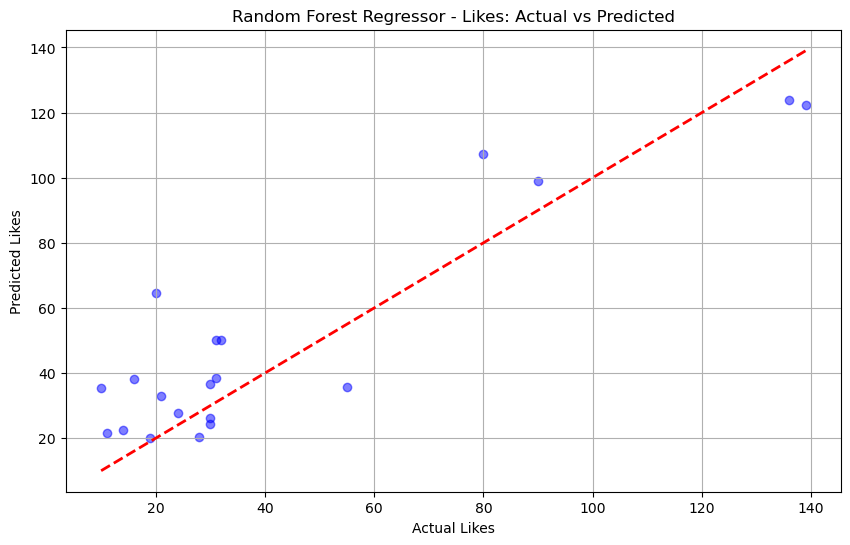

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_likes_test, likes_predictions, color='blue', alpha=0.5)
plt.plot([min(y_likes_test), max(y_likes_test)], [min(y_likes_test), max(y_likes_test)], linestyle='--', color='red', linewidth=2)

plt.title('Random Forest Regressor - Likes: Actual vs Predicted')
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.grid(True)
plt.show()